<a href="https://colab.research.google.com/github/smagara/LangGraph-Coursework/blob/main/langgraph_dual_condition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 🛠️ LangGraph course assignment IV:
  - Implement conditional logic to route the flow of data to different nodes
  - Use START and END built-in nodes to manage entry and exit points explicitly
   - Design multiple nodes to perform different operations
   - PLUS: this time add 2 conditional edges
      - 2 numbers and an operation
      - 2 additional numbers and a 2nd operation
   - Create a router node to handle decision-making and flow control
   - Learn to use the langgraph command:
   ``` python
    add_conditional_edges()
   ```

In [1]:
## installs
%pip install -U langgraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.4/152.4 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.5/216.5 kB 13.3 MB/s eta 0:00:00


In [2]:
## Setup imports
from typing import TypedDict
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display


In [3]:
## state object
class AgentState(TypedDict):
  number1: int
  number2: int
  operation1: str
  number3: int
  number4: int
  operation2: str
  final_result1: int
  final_result2: int

In [4]:
## first adder node
def adder1(state: AgentState) -> AgentState:
  """This node adds the first 2 numbers"""
  state['final_result1'] = (state['number1'] + state['number2'])
  return state

## second adder node
def adder2(state: AgentState) -> AgentState:
  """This node adds the second 2 numbers"""
  state['final_result2'] = (state['number3'] + state['number4'])
  return state

## first subtraction node
def subtractor1(state: AgentState) -> AgentState:
  """This node subtracts the first 2 numbers"""
  state['final_result1'] = (state['number1'] - state['number2'])
  return state

## second subtraction node
def subtractor2(state: AgentState) -> AgentState:
  """This node subtracts the second 2 numbers"""
  state['final_result2'] = (state['number3'] - state['number4'])
  return state

In [25]:
## Color codes for markdown error output
magenta_color_code = "\033[95m"
reset_color_code = "\033[0m"
red_color_code = "\033[91m"

In [31]:
## first illegal operation node
def illegal_operation_1(state: AgentState) -> AgentState:
  """This node reports an illegal operation for the first calculation"""
  print(magenta_color_code + "Illegal operation 1: " + red_color_code + state["operation1"] + reset_color_code)
  state['final_result1'] = -1
  return state

## second illegal operation node
def illegal_operation_2(state: AgentState) -> AgentState:
  """This node reports an illegal operation for the second calculation"""
  print(magenta_color_code + "Illegal operation 2: " + red_color_code + state["operation2"] + reset_color_code)
  state['final_result2'] = -1
  return state

In [32]:
## first router node, return next node name
def router1(state: AgentState) -> AgentState:
  """This node routes to the first adder or subtractor node"""
  if state['operation1'] == '+':
    return "add_edge1"
  elif state['operation1'] == '-':
    return "subtract_edge1"
  else:
    return "invalid_operation_edge1"

## second router node, return next node name
def router2(state: AgentState) -> AgentState:
  """This node routes to the second adder or subtractor node"""
  if state['operation2'] == '+':
    return "add_edge2"
  elif state['operation2'] == '-':
    return "subtract_edge2"
  else:
    return "invalid_operation_edge2"

In [33]:
## build the LangGraph flow
graph = StateGraph(AgentState)

graph.add_node("add_node1", adder1)
graph.add_node("add_node2", adder2)
graph.add_node("subtract_node1", subtractor1)
graph.add_node("subtract_node2", subtractor2)

graph.add_node("invalid_operation_node1", illegal_operation_1)
graph.add_node("invalid_operation_node2", illegal_operation_2)

graph.add_node("router_node1", lambda state:state) ## pass through function, return the same state pass-through
graph.add_node("router_node2", lambda state:state) ## pass through function, return the same state pass-through

# Add edges from the first operation to the router
graph.add_edge("add_node1", "router_node2")
graph.add_edge("subtract_node1", "router_node2")
graph.add_edge("invalid_operation_node1", END)

# Add edges from the second operation nodes to the END node
graph.add_edge("add_node2", END)
graph.add_edge("subtract_node2", END)
graph.add_edge("invalid_operation_node2", END)

# Conditional edges from router1
graph.add_conditional_edges(
    "router_node1",
    router1,
    {
        "add_edge1": "add_node1",
        "subtract_edge1": "subtract_node1",
        "invalid_operation_edge1": "invalid_operation_node1"
    }
)

# Conditional edges from router2
graph.add_conditional_edges(
    "router_node2",
    router2,
    {
        "add_edge2": "add_node2",
        "subtract_edge2": "subtract_node2",
        "invalid_operation_edge2": "invalid_operation_node2"
    }
)

graph.set_entry_point("router_node1")

app = graph.compile()

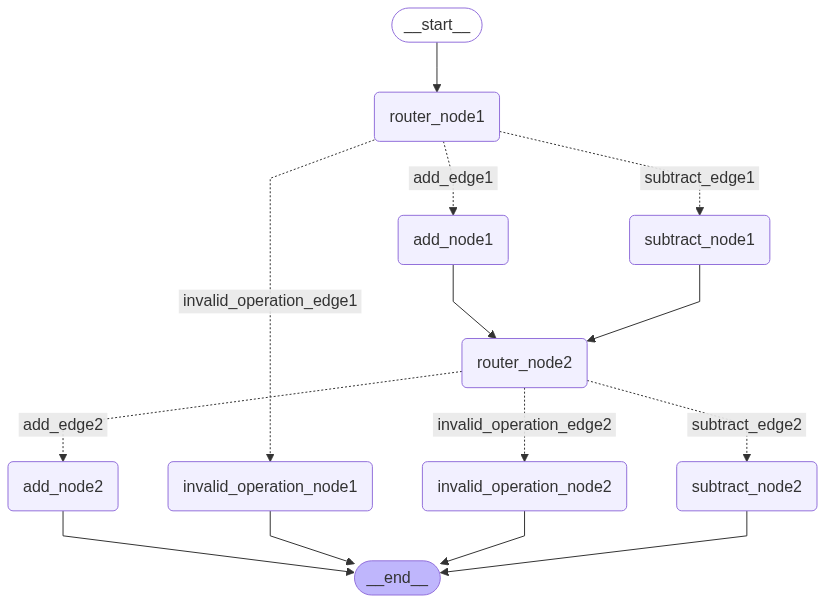

In [34]:
## show the state graph
display(Image(app.get_graph().draw_mermaid_png()))

In [35]:
## Run it!
app.invoke({
    "number1": 10,
    "number2": 5,
    "operation1": "+",
    "number3": 15,
    "number4": 8,
    "operation2": "-",
    "final_result1": 0,
    "final_result2": 0
})

{'number1': 10,
 'number2': 5,
 'operation1': '+',
 'number3': 15,
 'number4': 8,
 'operation2': '-',
 'final_result1': 15,
 'final_result2': 7}

In [37]:
## Run it!  Invalid operator 1
app.invoke({
    "number1": 10,
    "number2": 5,
    "operation1": "*",
    "number3": 15,
    "number4": 8,
    "operation2": "-",
    "final_result1": 0,
    "final_result2": 0
})

Illegal operation 1: *


{'number1': 10,
 'number2': 5,
 'operation1': '*',
 'number3': 15,
 'number4': 8,
 'operation2': '-',
 'final_result1': -1,
 'final_result2': 0}

In [38]:
## Run it!  Invalid operator 2
app.invoke({
    "number1": 10,
    "number2": 5,
    "operation1": "-",
    "number3": 15,
    "number4": 8,
    "operation2": "&",
    "final_result1": 0,
    "final_result2": 0
})

Illegal operation 2: &


{'number1': 10,
 'number2': 5,
 'operation1': '-',
 'number3': 15,
 'number4': 8,
 'operation2': '&',
 'final_result1': 5,
 'final_result2': -1}